<a href="https://colab.research.google.com/github/BrianBehnke/DS-Sprint-02-Storytelling-With-Data/blob/master/module3-make-explanatory-visualizations/LS_DS_123_Make_explanatory_visualizations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

_Lambda School Data Science_

# Choose appropriate visualizations


Recreate this [example by FiveThirtyEight:](https://fivethirtyeight.com/features/al-gores-new-movie-exposes-the-big-flaw-in-online-movie-ratings/)

![](https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png?w=575)

Using this data:

https://github.com/fivethirtyeight/data/tree/master/inconvenient-sequel

### Stretch goals

Recreate more examples from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

For example:
- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) ([`altair`](https://altair-viz.github.io/gallery/index.html#maps))
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) ([`statsmodels`](https://www.statsmodels.org/stable/index.html))

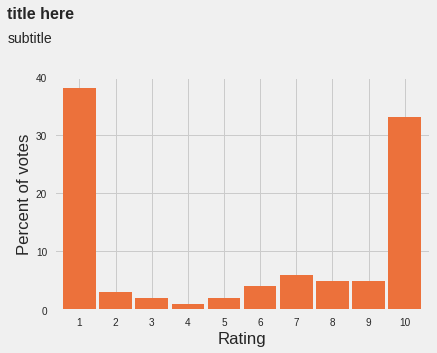

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')

fake = pd.Series([38, 3, 2, 1, 2, 4, 6, 5, 5, 33], index=range(1,11))

ax = fake.plot.bar(color='#EC713B', width=0.9)

ax.set(xlabel='Rating', ylabel='Percent of votes', yticks=range(0,50,10))
ax.text(x=-2, y=50, s="title here", fontsize=16, fontweight='bold')
ax.text(x=-2, y=46, s="subtitle")

ax.tick_params(labelrotation=0)


In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head().T

,0,1,2,3,4
timestamp,2017-07-17 12:28:32.785639,2017-07-17 12:28:33.025600,2017-07-17 12:28:33.273919,2017-07-17 12:28:33.495325,2017-07-17 12:28:33.722849
respondents,402,78,4,4,130
category,Males,Females,Aged under 18,Males under 18,Aged 18-29
link,http://www.imdb.com/title/tt6322922/ratings-male,http://www.imdb.com/title/tt6322922/ratings-fe...,http://www.imdb.com/title/tt6322922/ratings-age_1,http://www.imdb.com/title/tt6322922/ratings-ma...,http://www.imdb.com/title/tt6322922/ratings-age_2
average,4.6,6.9,4.2,4.2,6.3
mean,5,7.7,4.2,4.2,6.5
median,2,10,3,3,9
1_votes,197,16,2,2,41
2_votes,7,1,0,0,0
3_votes,7,0,0,0,3


In [3]:
df.timestamp = pd.to_datetime(df.timestamp)
df.timestamp.describe()

count                          80053
unique                         80053
top       2017-07-24 23:00:02.760781
freq                               1
first     2017-07-17 12:28:32.785639
last      2017-08-29 23:10:06.218251
Name: timestamp, dtype: object

In [4]:
df.set_index('timestamp', inplace=True)
df.head()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,...,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,...,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,...,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,...,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [5]:
df[df.category=='IMDb users']

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,...,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,
2017-07-17 12:28:36.697246,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,...,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 12:34:21.250099,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,...,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 13:00:06.506688,678,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.4,5,304,14,8,5,...,44.8,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.8
2017-07-17 14:00:06.727742,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 15:00:06.055125,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 16:00:06.023053,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 17:00:06.142993,679,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,305,14,8,5,...,44.9,2.1,1.2,0.7,1.3,1.5,2.7,3.5,4.4,37.7
2017-07-17 18:00:06.510891,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,...,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6
2017-07-17 19:00:06.666467,680,IMDb users,http://www.imdb.com/title/tt6322922/ratings,4.9,5.3,5,306,14,8,5,...,45.0,2.1,1.2,0.7,1.3,1.5,2.6,3.5,4.4,37.6


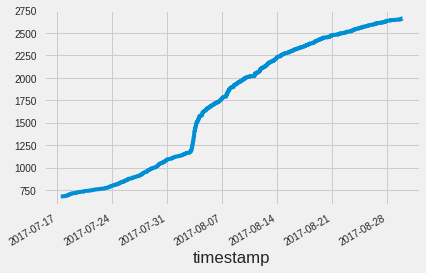

In [6]:
alldays = df[0:]


alldays[alldays.category=='IMDb users'].respondents.plot();

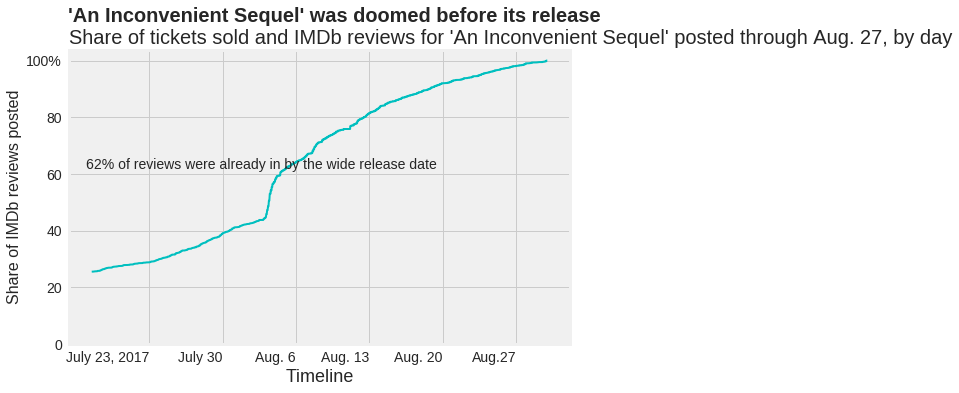

In [26]:
#from matplotlib.ticker import FuncFormatter
#import matplotlib.ticker as mtick
#plt.style.use('fivethirtyeight')
#from textwrap import wrap
import datetime

#set_wrap(wrap)

f, ax = plt.subplots(facecolor='w')

alldays[alldays.category=='IMDb users'].respondents.plot(color='c', figsize=(8,6), linewidth=2);

plt.gca().set_yticklabels(['{:.0f}%'.format(x*100/2662) for x in plt.gca().get_yticks()])

plt.suptitle("'An Inconvenient Sequel' was doomed before its release", fontsize=20, fontweight='bold', x=.54)
plt.title("Share of tickets sold and IMDb reviews for 'An Inconvenient Sequel' posted through Aug. 27, by day", fontsize=20, loc='left')
plt.xlabel('Timeline', fontsize=18)
plt.ylabel('Share of IMDb reviews posted', fontsize=16)

xticks=['2017-07-23', '2017-07-30', '2017-08-06','2017-08-13', '2017-08-20', '2017-08-27']
xticklabels = ['July 23, 2017', 'July 30', 'Aug. 6', 'Aug. 13', 'Aug. 20', 'Aug.27']
yticks=[0, 532.4, 1064.8, 1597.2, 2129.6, 2662]
yticklabels = ['0', '20', '40', '60', '80', '100%']

ax.set_xticks(xticks)
ax.set_xticklabels(xticklabels, rotation=0, fontsize=14)
ax.set_yticks(yticks)
ax.set_yticklabels(yticklabels, fontsize=14);

#t = ("62% of reviews were already in by the wide release date")
#plt.text(2017, 1500, t, ha='left', wrap=True)
#ax.text('2017-07-17', 1650, "62% of reviews were already in by the wide release date", fontsize=11)
#ax.text(datetime.date(2017, 7, 17), 1650, s="62% of reviews were already in by the wide release date", fontsize=11)

# https://matplotlib.org/users/annotations_guide.html
ax.annotate('62% of reviews were already in by the wide release date', xy=('2017-07-17', 1650));

#title = ax.set_title("\n".join(wrap("'An Inconvenient Sequel' was doomed before its release           Share of tickets sold and IMDb reviews for 'An Inconvenient Sequel' posted through Aug. 27, by day", 69)))

#title.set_y(1.05)


In [14]:
from IPython.display import display, Image
url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-21.png'
reviews_over_time = Image(url=url, width=575)

display(reviews_over_time)

In [92]:
alldays = df[0:]

print(alldays.head())

grouped = alldays[alldays.category=='IMDb users'].respondents

grouped.tail()

                            respondents        category  \
timestamp                                                 
2017-07-17 12:28:32.785639          402           Males   
2017-07-17 12:28:33.025600           78         Females   
2017-07-17 12:28:33.273919            4   Aged under 18   
2017-07-17 12:28:33.495325            4  Males under 18   
2017-07-17 12:28:33.722849          130      Aged 18-29   

                                                                         link  \
timestamp                                                                       
2017-07-17 12:28:32.785639   http://www.imdb.com/title/tt6322922/ratings-male   
2017-07-17 12:28:33.025600  http://www.imdb.com/title/tt6322922/ratings-fe...   
2017-07-17 12:28:33.273919  http://www.imdb.com/title/tt6322922/ratings-age_1   
2017-07-17 12:28:33.495325  http://www.imdb.com/title/tt6322922/ratings-ma...   
2017-07-17 12:28:33.722849  http://www.imdb.com/title/tt6322922/ratings-age_2   

                  

timestamp
2017-08-29 22:30:06.423181    2662
2017-08-29 22:40:06.233659    2662
2017-08-29 22:50:06.592571    2662
2017-08-29 23:00:05.829558    2662
2017-08-29 23:10:06.218251    2662
Name: respondents, dtype: int64